In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import Timestamp
from IPython.display import display
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *
from Functions.analysis.step_analysis import *
from Functions.AlertP1.dummy_features import *
from Functions.Models.decision_tree import *
from Functions.Models.Logistic_regression import *
from Functions.Models.evaluation import *

creds = ["uktuserdaroglu","Vacy4201(Pri","172.20.20.4","hgo",3306]
#Connection to the database
host = creds[2]
user = creds[0]
password = creds[1]
database = creds[3]
port = creds[4]
mydb = mysql.connector.connect(host=host, user=user, database=database, port=port, password=password, auth_plugin='mysql_native_password')
mycursor = mydb.cursor()

#Safecheck to guarantee that the connection worked
mycursor.execute('SHOW TABLES;')
print(f"Tables: {mycursor.fetchall()}")
print(mydb.connection_id) #it'll give connection_id,if got connected

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',)]
219


In [2]:
alertP = pd.read_sql("""SELECT * FROM consultaneurologia201216anon_true""",mydb)
alertP1=alertP.copy()
alertP1
alertP1.info()
alertP1.head()

/Users/utkuserdaroglu/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_DOENTE            10150 non-null  object
 1   PROCESSO             10150 non-null  object
 2   COD_REFERENCIA       10150 non-null  object
 3   COD_PZ               10150 non-null  object
 4   COD_UNID_SAUDE_PROV  10150 non-null  int64 
 5   UNID_PROV            10150 non-null  object
 6   TIPO_UNID            10150 non-null  object
 7   PROVENIENCIA         10150 non-null  object
 8   COD_CTH_PRIOR        10150 non-null  object
 9   CTH_PRIOR            10150 non-null  object
 10  COD_MOTIVO_RECUSA    10150 non-null  int64 
 11  DES_MOTIVO_RECUSA    10150 non-null  object
 12  COD_ESPECIALIDADE    10150 non-null  int64 
 13  DES_ESPECIALIDADE    10150 non-null  object
 14  agrupadora           10150 non-null  object
 15  OUTRA_ENTIDADE       10150 non-null  int64 
 16  DATA

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,DATA_MARCACAO,DATA_REALIZACAO,OBSERVACOES,Mês_entrada,Ano_entrada,trata data recusa,resume saída,mês_saida,ano_saida,Texto
0,SSHCCB,LVMVDV,LQHSOQLH,GDCADAB,3151575,USF TORRE DA MARINHA,CS/USF,CTH,3,Normal,...,21/05/2015,12/06/2015,,11,2014,21/05/2015,12/06/2015,6,2015,"Utente de 75 anos, refere tremor desde há 5 an..."
1,CSAS,LVMVBD,LOHLTRTS,FZFZSDB,3152471,USF SERVIR SAUDE-CS,CS/USF,CTH,,,...,27/04/2012,02/07/2012,,4,2012,23/04/2012,02/07/2012,7,2012,Avaliação neurologica para avaliação da toma d...
2,ADCFD,LVMMVJ,LQHROQHL,,0,,OUTRA,SAM,,,...,26/09/2014,13/01/2015,,9,2014,26/09/2014,13/01/2015,1,2015,cefaleias
3,SSZDBZ,LVMMLV,LPHQULSU,CSGGHEZ,3151672,USF AMORA SAUDAVEL,CS/USF,CTH,,,...,28/10/2013,03/12/2013,,10,2013,25/10/2013,03/12/2013,12,2013,"Utente do sexo feminino com 30 anos de idade, ..."
4,SEAHEG,LVMNDL,LPHHVHVL,,0,,OUTRA,,,,...,,,Conforme e-mail de 30/11/2015,2,2013,26/02/2013,26/02/2013,2,2013,Sem relatorio clinico


In [3]:
#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)

/Users/utkuserdaroglu/Desktop/utkubranch/PBL-HGO/Functions/AlertP1/data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
/Users/utkuserdaroglu/Desktop/utkubranch/PBL-HGO/Functions/AlertP1/data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'


In [4]:
class_area(alertP1)
text_length(alertP1)
referral_steps(alertP1)
speciality(alertP1)
alertP1=unit(alertP1)
alertP1=alertP1.sort_values('DATA_RECEPCAO',ascending=False)
alertP1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9374 entries, 5513 to 6944
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_DOENTE            9374 non-null   object        
 1   PROCESSO             9374 non-null   object        
 2   COD_REFERENCIA       9374 non-null   object        
 3   COD_PZ               9374 non-null   object        
 4   COD_UNID_SAUDE_PROV  9374 non-null   int64         
 5   UNID_PROV            9374 non-null   object        
 6   TIPO_UNID            9374 non-null   object        
 7   PROVENIENCIA         9374 non-null   object        
 8   COD_CTH_PRIOR        9374 non-null   object        
 9   CTH_PRIOR            9374 non-null   object        
 10  COD_MOTIVO_RECUSA    9374 non-null   int64         
 11  DES_MOTIVO_RECUSA    9374 non-null   object        
 12  COD_ESPECIALIDADE    9374 non-null   int64         
 13  DES_ESPECIALIDADE    9374 non-

/Users/utkuserdaroglu/Desktop/utkubranch/PBL-HGO/Functions/AlertP1/features.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['step'][alertP1['step']>=3]='3+'
/Users/utkuserdaroglu/Desktop/utkubranch/PBL-HGO/Functions/AlertP1/features.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['unit'][alertP1['TIPO_UNID']!='CS/USF']='HOSP'


In [5]:
alertP2 = alertP1.dropna(subset=['DATA_RECEPCAO'])
eda=alertP2["DATA_RECEPCAO"].sort_values(ascending=False)
alertP2.head()
print(eda)


5513   2016-12-30
6424   2016-12-30
9425   2016-12-30
4044   2016-12-30
5534   2016-12-29
          ...    
6542   2012-01-03
2078   2012-01-03
8620   2012-01-03
9915   2012-01-02
6944   2012-01-02
Name: DATA_RECEPCAO, Length: 9374, dtype: datetime64[ns]


In [6]:
alertP2['Total'] = 1
alertP2=alertP2[["DATA_RECEPCAO","result","Total"]]
alertP2=alertP2[alertP2["result"]!=""]
alertP2["result"]=alertP2["result"].astype(int)
alertP2["DATA_RECEPCAO"] =pd.to_datetime(alertP2["DATA_RECEPCAO"])
alertP2.set_index("DATA_RECEPCAO", inplace=True)

alertP2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9374 entries, 2016-12-30 to 2012-01-02
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   result  9374 non-null   int64
 1   Total   9374 non-null   int64
dtypes: int64(2)
memory usage: 219.7 KB


In [7]:
#Monthly referral distribution for all sample
monthly_data = alertP2.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data["Acceptance_Rate"]=monthly_data["result"]/monthly_data["Total"]
#monthly_data = monthly_data[monthly_data.index.year < 2017]


monthly_data

,result,Total,Acceptance_Rate
DATA_RECEPCAO,,,
2012-01-31,91,140,0.650000
2012-02-29,81,134,0.604478
2012-03-31,67,123,0.544715
2012-04-30,57,114,0.500000
2012-05-31,84,155,0.541935
2012-06-30,65,124,0.524194
2012-07-31,64,107,0.598131
2012-08-31,70,107,0.654206
2012-09-30,65,90,0.722222


In [8]:
monthly_data["result"].count()

60

In [9]:
alertP3 = alertP1.dropna(subset=['DATA_RECEPCAO'])
alertP3['Total'] = 1
alertP3=alertP3[alertP3["text_length"]>1]
alertP3=alertP3[["DATA_RECEPCAO","result","Total"]]
alertP3=alertP3[alertP3["result"]!=""]
alertP3["result"]=alertP3["result"].astype(int)
alertP3["DATA_RECEPCAO"] =pd.to_datetime(alertP3["DATA_RECEPCAO"])
alertP3.set_index("DATA_RECEPCAO", inplace=True)

In [10]:
#Monthly referral with text distribution for all sample


text = alertP3.resample('M').agg({'result': 'sum', 'Total': 'sum'})
text["Acceptance_Rate"]=text["result"]/text["Total"]

text.count()

result             60
Total              60
Acceptance_Rate    60
dtype: int64

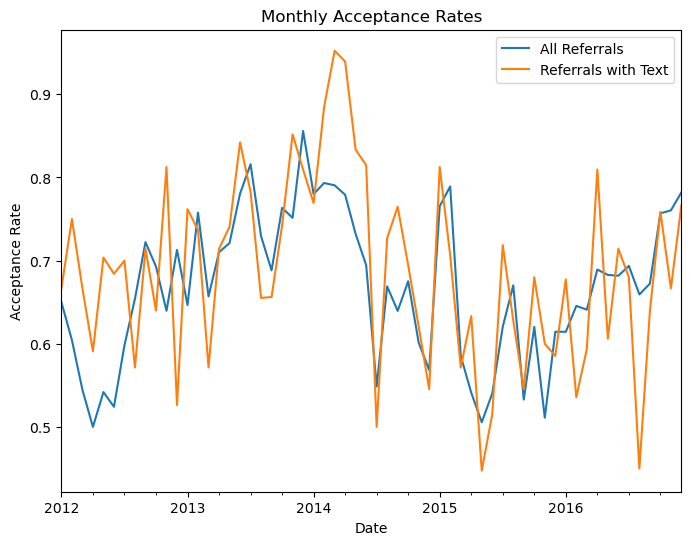

In [11]:
# create a single plot
ax = monthly_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6),)

# plot data from the second dataframe onto the same plot
text["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax)

# set title and labels
ax.set_title('Monthly Acceptance Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Acceptance Rate')
ax.legend(['All Referrals', 'Referrals with Text'])

# display the plot
plt.show()

In [12]:
#Same analysis for data retorno


In [13]:
alertP5 = alertP1.dropna(subset=['DATA_RETORNO'])
alertP5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9027 entries, 5513 to 6944
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_DOENTE            9027 non-null   object        
 1   PROCESSO             9027 non-null   object        
 2   COD_REFERENCIA       9027 non-null   object        
 3   COD_PZ               9027 non-null   object        
 4   COD_UNID_SAUDE_PROV  9027 non-null   int64         
 5   UNID_PROV            9027 non-null   object        
 6   TIPO_UNID            9027 non-null   object        
 7   PROVENIENCIA         9027 non-null   object        
 8   COD_CTH_PRIOR        9027 non-null   object        
 9   CTH_PRIOR            9027 non-null   object        
 10  COD_MOTIVO_RECUSA    9027 non-null   int64         
 11  DES_MOTIVO_RECUSA    9027 non-null   object        
 12  COD_ESPECIALIDADE    9027 non-null   int64         
 13  DES_ESPECIALIDADE    9027 non-

In [14]:
alertP5['Total'] = 1
alertP5=alertP5[["DATA_RETORNO","result","Total"]]
alertP5=alertP5[alertP5["result"]!=""]
alertP5["result"]=alertP5["result"].astype(int)
alertP5["DATA_RETORNO"] =pd.to_datetime(alertP5["DATA_RETORNO"])
alertP5.set_index("DATA_RETORNO", inplace=True)
#Monthly referral distribution for all sample
monthly_datar = alertP5.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_datar["Acceptance_Rate"]=monthly_datar["result"]/monthly_datar["Total"]
monthly_datar

/var/folders/h9/v0fvmkcx2fg901hrz6xs3x9c0000gn/T/ipykernel_984/3186964358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP5['Total'] = 1


,result,Total,Acceptance_Rate
DATA_RETORNO,,,
2012-01-31,58,97,0.597938
2012-02-29,74,117,0.632479
2012-03-31,64,122,0.524590
2012-04-30,57,109,0.522936
2012-05-31,81,156,0.519231
...,...,...,...
2019-03-31,0,0,NaN
2019-04-30,0,0,NaN
2019-05-31,0,0,NaN


In [15]:
alertP6 = alertP1.dropna(subset=['DATA_RETORNO'])
alertP6['Total'] = 1
alertP6=alertP6[alertP6["text_length"]>1]
alertP6=alertP6[["DATA_RETORNO","result","Total"]]
alertP6=alertP6[alertP6["result"]!=""]
alertP6["result"]=alertP6["result"].astype(int)
alertP6["DATA_RETORNO"] =pd.to_datetime(alertP6["DATA_RETORNO"])
alertP6.set_index("DATA_RETORNO", inplace=True)


text_r = alertP6.resample('M').agg({'result': 'sum', 'Total': 'sum'})
text_r["Acceptance_Rate"]=text_r["result"]/text_r["Total"]
text_r

/var/folders/h9/v0fvmkcx2fg901hrz6xs3x9c0000gn/T/ipykernel_984/2064926694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP6['Total'] = 1


,result,Total,Acceptance_Rate
DATA_RETORNO,,,
2012-01-31,13,20,0.650000
2012-02-29,17,23,0.739130
2012-03-31,12,16,0.750000
2012-04-30,14,23,0.608696
2012-05-31,16,26,0.615385
...,...,...,...
2019-03-31,0,0,NaN
2019-04-30,0,0,NaN
2019-05-31,0,0,NaN


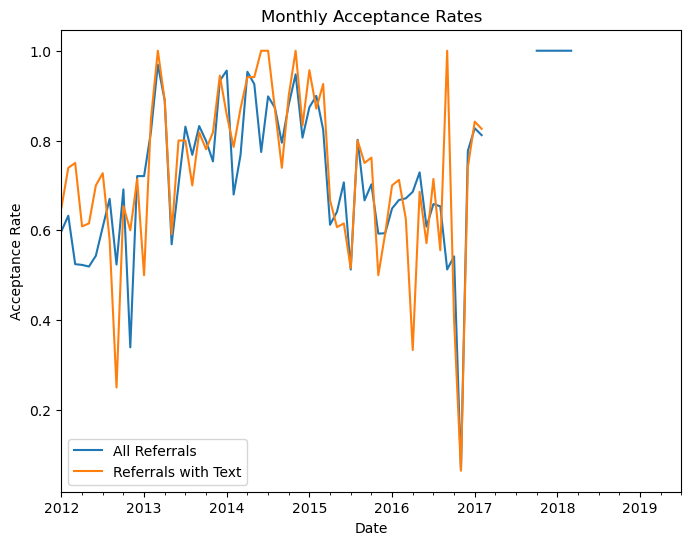

In [16]:
# create a single plot
ax = monthly_datar["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6),)

# plot data from the second dataframe onto the same plot
text_r["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax)

# set title and labels
ax.set_title('Monthly Acceptance Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Acceptance Rate')
ax.legend(['All Referrals', 'Referrals with Text'])

# display the plot
plt.show()

In [17]:
monthly_datar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2012-01-31 to 2019-07-31
Freq: M
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   result           91 non-null     int64  
 1   Total            91 non-null     int64  
 2   Acceptance_Rate  71 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.8 KB


In [18]:
monthly_data_cleaned = monthly_datar.dropna(subset=['Acceptance_Rate'])
text_r_cleaned=text_r.dropna(subset=['Acceptance_Rate'])

In [20]:
monthly_data_cleaned=monthly_data_cleaned[monthly_data_cleaned["DATA_RETORNO"]<=2017]
text_r_cleaned

KeyError: 'DATA_RETORNO'

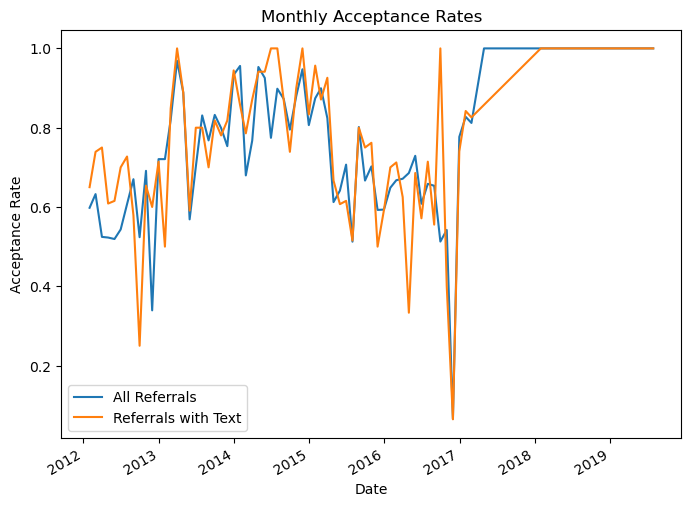

In [19]:
# create a single plot
ax = monthly_data_cleaned["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6),)

# plot data from the second dataframe onto the same plot
text_r_cleaned["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax)

# set title and labels
ax.set_title('Monthly Acceptance Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Acceptance Rate')
ax.legend(['All Referrals', 'Referrals with Text'])

# display the plot
plt.show()